# **ArtLine**
**Create** **Amazing** **Line** **Art**.

In [1]:
!git clone https://github.com/vijishmadhavan/ArtLine.git ArtLine

Cloning into 'ArtLine'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 485 (delta 1), reused 4 (delta 1), pack-reused 479
Receiving objects: 100% (485/485), 356.83 KiB | 4.35 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [2]:
cd ArtLine

/content/ArtLine


In [3]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 20.3 MB 1.4 MB/s 
     |████████████████████████████████| 10.5 MB 31.5 MB/s 
     |████████████████████████████████| 748.8 MB 19 kB/s 
     |████████████████████████████████| 5.9 MB 37.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

# **Runtime**

* Hardware Accelerator = GPU 

In [1]:
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from io import BytesIO
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from PIL import Image
from io import BytesIO
import torchvision.transforms as T

class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

# def add_margin(pil_img, top, right, bottom, left, color):
#     width, height = pil_img.size
#     new_width = width + right + left
#     new_height = height + top + bottom
#     result = Image.new(pil_img.mode, (new_width, new_height), color)
#     result.paste(pil_img, (left, top))
#     return result

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# MODEL_URL = "https://www.dropbox.com/s/04suaimdpru76h3/ArtLine_920.pkl?dl=1 "
# urllib.request.urlretrieve(MODEL_URL, "ArtLine_920.pkl")
# path = Path(".")
# learn=load_learner(path, 'ArtLine_920.pkl')

In [2]:
MODEL_URL = "https://www.dropbox.com/s/starqc9qd2e1lg1/ArtLine_650.pkl?dl=1"
urllib.request.urlretrieve(MODEL_URL, "ArtLine_650.pkl")
path = Path(".")
learn=load_learner(path, 'ArtLine_650.pkl')

# **URL**
Type in a url to a direct link of an **high quality image**. Usually that means they'll end in .png, .jpg, etc. 

**Note** : Works well with **portrait photos having good lighting and plain background**. But you're free to explore.

Link to high-quality portrait pics. Click on the image, let it expand and then copy image address.

https://www.freepik.com/search?dates=any&format=search&from_query=Portrait&page=1&query=Portrait&sort=popular&type=photo

In [ ]:
# url = 'https://images.generated.photos/1nlviUNv3Z07yxzuKP_-6_v07t4dLwacUNMtw8TF_pM/rs:fit:512:512/wm:0.95:sowe:18:18:0.33/czM6Ly9pY29uczgu/Z3Bob3Rvcy1wcm9k/LnBob3Rvcy92M18w/MDg5OTQ5LmpwZw.jpg' #@param {type:"string"}

# response = requests.get(url)
# img = PIL.Image.open(BytesIO(response.content)).convert("RGB")
# # im_new = add_margin(img, 250, 250, 250, 250, (255, 255, 255))
# img.save("test.jpg", quality=95)
# img = open_image("test.jpg")
# show_image(img, figsize=(10,10), interpolation='nearest');

In [ ]:
# p,img_hr,b = learn.predict(img)
# show_image(img_hr, figsize=(9,9), interpolation='nearest');

In [ ]:
FOLDER_PHOTO = 'gdrive/MyDrive/SKRIPSI/photos/'
FOLDER_SKETCH = 'gdrive/MyDrive/SKRIPSI/sketches/'

for filename in os.listdir(FOLDER_PHOTO):
    # print(filename)
    img = open_image(os.path.join(FOLDER_PHOTO,filename))
    p, img_hr, b = learn.predict(img)
    p.save(os.path.join(FOLDER_SKETCH,filename))

print("DONEE")

DONEE


In [ ]:
FOLDER_PHOTO = 'gdrive/MyDrive/SKRIPSI/filtered/'
FOLDER_SKETCH = 'gdrive/MyDrive/SKRIPSI/sketches/'

for filename in os.listdir(FOLDER_PHOTO):
    # print(filename)
    img = open_image(os.path.join(FOLDER_PHOTO,filename))
    p, img_hr, b = learn.predict(img)
    p.save(os.path.join(FOLDER_SKETCH,filename))
    print(filename)

print("DONEE")

In [ ]:
FOLDER_PHOTO = 'gdrive/MyDrive/SKRIPSI/last_batch/'
FOLDER_SKETCH = 'gdrive/MyDrive/SKRIPSI/sketches/'

for filename in os.listdir(FOLDER_PHOTO):
    # print(filename)
    img = open_image(os.path.join(FOLDER_PHOTO,filename))
    p, img_hr, b = learn.predict(img)
    p.save(os.path.join(FOLDER_SKETCH,filename))
    print(filename)

print("DONEE")

In [ ]:
test_image_link = '0248.jpg'
img = open_image(os.path.join(FOLDER_PHOTO,test_image_link))
p, img_hr, b = learn.predict(img)
print(type(p))
p.save('saved.jpg')


# image_link = FOLDER + '9999.jpg'
# img = open_image(test_image_link)
# show_image(img, figsize=(10,10), interpolation='nearest')

<class 'fastai.vision.image.Image'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


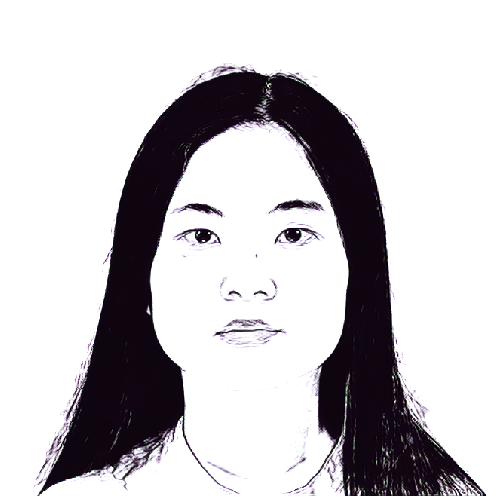

In [ ]:
p,img_hr,b = learn.predict(img)
show_image(img_hr, figsize=(9,9), interpolation='nearest')

# Custom image

In [6]:
img = open_image('pasfoto_nathan.jpg')
p, img_hr, b = learn.predict(img)
print(type(p))
p.save('saved.jpg')

<class 'fastai.vision.image.Image'>
